In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")
fashion_train.shape

(60000, 785)

In [3]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

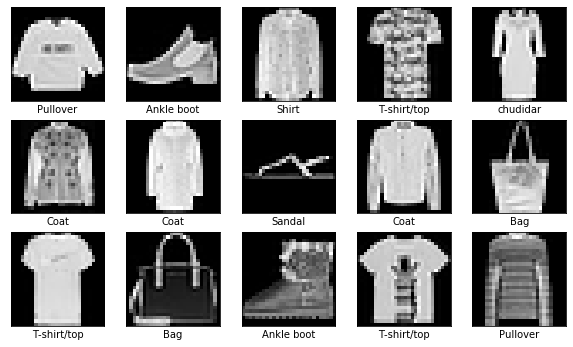

In [4]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','chudidar','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [5]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [6]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])


In [7]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()       #for dense1 input is dense output, for dense2 input is dense output1,for dense3 input is dense output2,

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 24)               96        
 hNormalization)                                        

In [8]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])


In [9]:
#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/30
600/600 [==============================] - 9s 9ms/step - loss: 1.0855 - accuracy: 0.6302 - val_loss: 0.5420 - val_accuracy: 0.8127
Epoch 2/30
600/600 [==============================] - 5s 8ms/step - loss: 0.7371 - accuracy: 0.7495 - val_loss: 0.4901 - val_accuracy: 0.8368
Epoch 3/30
600/600 [==============================] - 5s 8ms/step - loss: 0.6706 - accuracy: 0.7702 - val_loss: 0.4688 - val_accuracy: 0.8446
Epoch 4/30
600/600 [==============================] - 5s 8ms/step - loss: 0.6315 - accuracy: 0.7852 - val_loss: 0.4479 - val_accuracy: 0.8478
Epoch 5/30
600/600 [==============================] - 5s 8ms/step - loss: 0.6088 - accuracy: 0.7929 - val_loss: 0.4361 - val_accuracy: 0.8552
Epoch 6/30
600/600 [==============================] - 5s 8ms/step - loss: 0.5926 - accuracy: 0.7989 - val_loss: 0.4506 - val_accuracy: 0.8501
Epoch 7/30
600/600 [==============================] - 5s 8ms/step - loss: 0.5793 - accuracy: 0.8027 - val_loss: 0.4640 - val_accuracy: 0.8441
Epoch 

In [10]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 1s 3ms/step - loss: 0.3807 - accuracy: 0.8725


In [11]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8725


In [12]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 [==============================] - 1s 3ms/step


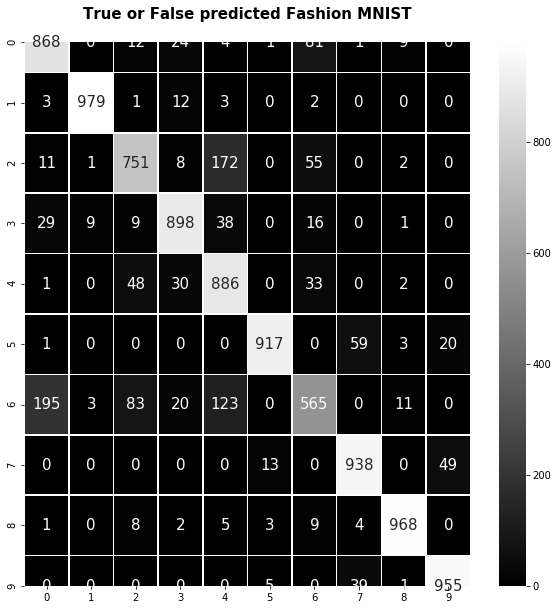

In [13]:
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.75      0.79      1000
           3       0.90      0.90      0.90      1000
           4       0.72      0.89      0.79      1000
           5       0.98      0.92      0.95      1000
           6       0.74      0.56      0.64      1000
           7       0.90      0.94      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [15]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


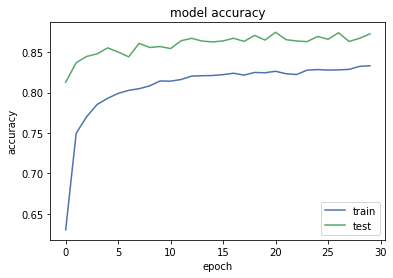

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


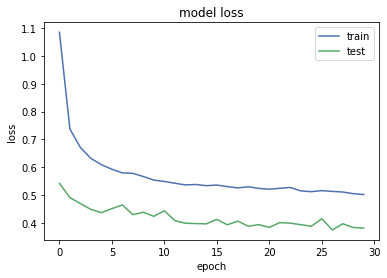

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [18]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 [==============================] - 0s 43ms/step


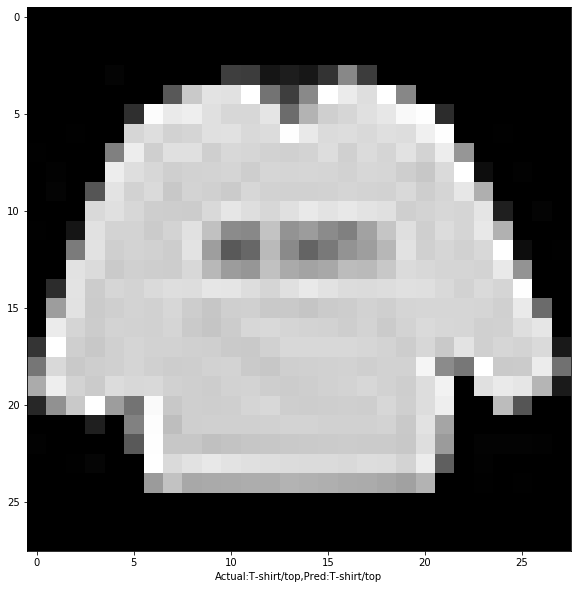

In [19]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()